# 1.Introduction to data cleaning

Data with a consistent format is often described as "clean." As data scientists, not all data we encounter is clean; we often need to prepare it in a process called data cleaning.

Each row of our data is represented by a list, with each item in that list representing an item from the row. Each "row list" is stored in one single outer list — which is why we call this format a list of lists. The diagram above shows a simple table of data and its lists of list representation.

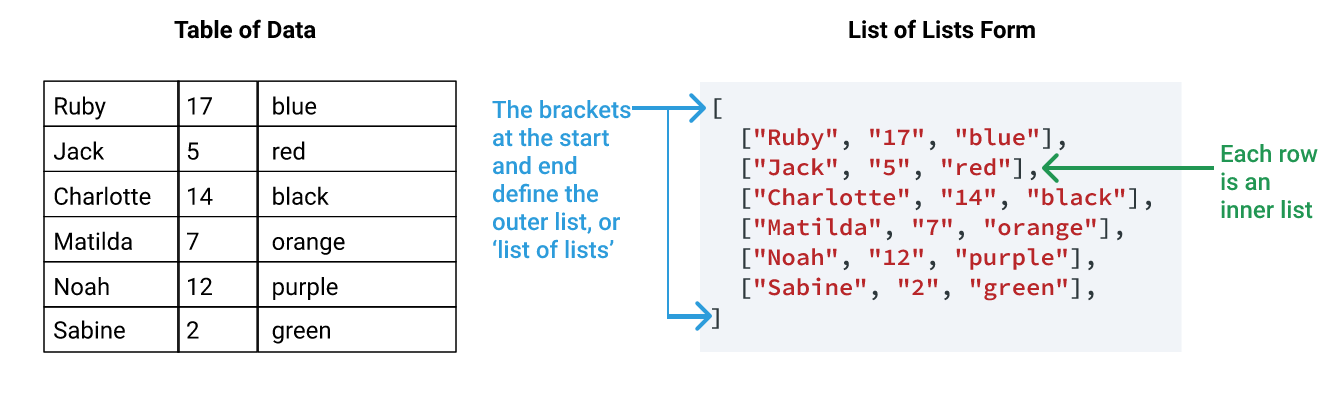

In [1]:
# import dataset file
from csv import reader

moma=reader(open('C:/Users/krishna/Desktop/GITHUB~1/DATA-A~2/Datasets/step_1/C2/artworks.csv',encoding='utf-8'))

#convert above data file into list of list format
moma=list(moma)

In [2]:
#inspect data set
print(moma[:5])

[['Title', 'Artist', 'Nationality', 'BeginDate', 'EndDate', 'Gender', 'Date', 'Department'], ['Dress MacLeod from Tartan Sets', 'Sarah Charlesworth', '(American)', '(1947)', '(2013)', '(Female)', '1986', 'Prints & Illustrated Books'], ['Duplicate of plate from folio 11 verso (supplementary suite, plate 4) from ARDICIA', 'Pablo Palazuelo', '(Spanish)', '(1916)', '(2007)', '(Male)', '1978', 'Prints & Illustrated Books'], ['Tailpiece (page 55) from SAGESSE', 'Maurice Denis', '(French)', '(1870)', '(1943)', '(Male)', '1889-1911', 'Prints & Illustrated Books'], ['Headpiece (page 129) from LIVRET DE FOLASTRIES, À JANOT PARISIEN', 'Aristide Maillol', '(French)', '(1861)', '(1944)', '(Male)', '1927-1940', 'Prints & Illustrated Books']]


In [3]:
# count no of rows
num_rows=len(moma)
print('no of rows are ',num_rows)

no of rows are  16726


# 2. Reading our MoMA Data Set

* Python has a built-in csv module that can handle the work of opening a CSV for us
* First, we start by importing the reader() function from the csv module:
  `from csv import reader`
 * Next, we use the Python built-in function open() to open the artworks.csv file:
   `open('artworks.csv')`
  * We then use reader() to parse (or interpret) the opened_file
    `reader(open('artworks.csv'))`
  * Once we have parsed the data, we use the list() function to convert the read_file into a list of lists format: 
    `list(reader(open('artworks.csv')))`

In [4]:
# remove the first row containing column names
column_names=moma[:1]
moma=moma[1:]
column_names

[['Title',
  'Artist',
  'Nationality',
  'BeginDate',
  'EndDate',
  'Gender',
  'Date',
  'Department']]

# 3. Replacing Substrings with the replace Method

* Parts of strings are called substrings.
* We can use the str.replace() method to find and replace substrings.
* str.replace() requires two arguments:
old: The substring we want to find and replace.
new: The substring we want to replace old with.
* When we use str.replace(), we substitute the str for the variable name of the string we want to modify.
* We need to use = to assign the modified string to a variable name.

In [5]:
str_1="My age is 32-year old"

# modify above string and replace 32 with 21
new_age=str_1.replace('32','31')
print(new_age)

My age is 31-year old


# 4. Cleaning the Nationality and Gender Columns

In [6]:
# find index of 'Nationality' and 'Gender' columns
nationality_index=column_names[0].index('Nationality')

gender_index=column_names[0].index('Gender')

print('index of %s is %s and index of %s is %s'%('Nationality',nationality_index,'Gender',gender_index))

index of Nationality is 2 and index of Gender is 5


In [7]:
# print 'Nationality' column to see what string pattern it contains
for row in moma[:15]:
    print(row[2])

(American)
(Spanish)
(French)
(French)
(French)
(American)
(French)
(American)
(South African)
(Canadian)
(French)
(American)
(Czech)
(American)
(American)


In [8]:
# print 'Gender' column to see what string pattern it contains
for row in moma[:15]:
    print(row[5])

(Female)
(Male)
(Male)
(Male)
(Male)
(Male)
(Male)
(Male)
(Female)
(Male)
(Male)
(Male)
(Male)
(Male)
(Male)


### Above column values have extra parenthesis which have to remove

In [9]:
# replace '(',')' with ''

for row in moma:
    nationality=row[2]
    row[2]=nationality.replace('(','').replace(')','')  # two replace functions are concatenated to remove two parenthesis (,)
    gender=row[5]
    row[5]=gender.replace('(','').replace(')','')

In [10]:
# print 'Gender' column to see what string pattern it contains
for row in moma[:10]:
    print(row[5])

Female
Male
Male
Male
Male
Male
Male
Male
Female
Male


In [11]:
# print 'Nationality' column to see what string pattern it contains
for row in moma[:5]:
    print(row[2])

American
Spanish
French
French
French


### It shows columns are cleaned

# 5. String Capitalization

* There are two different capitalizations in use in our data set for "male" in 'Gender' column
* This sort of inconsistency is often caused when there is manual data entry and different people use different capitalizations when they enter words.

There are a few ways we could handle this using what we know so far:

* We could use str.replace() to replace m with M, but then we'd end up with instances of FeMale.
* We could use str.replace() to replace male with Male. This would also give us instances of FeMale.

### The str.title() method returns a copy of the string with the first letter of each word transformed to uppercase (also known as title case).

We have a number of rows containing an empty string ("") for the Gender column. This could mean:

* That the person entering the data didn't know the gender of the artist.
* That the artist is unknown and so the gender is also unknown.
* That the artist's gender is non-binary.
* When we correct the capitalization, we'll also take the opportunity to label these with the string "Gender Unknown/Other".

In [12]:
# loop over moma data
for row in moma:
    gender=row[5]
    nationality=row[2]
    row[5]=gender.title()
    row[2]=nationality.title()
    if not gender:
        row[5]='Gender Unknown/Other'
    if not nationality:
        row[2]='Unknown nationality'

In [13]:
# print 'Gender' column to see what string pattern it contains
for row in moma[:5]:
    print(row[5])

Female
Male
Male
Male
Male


# 6. Errors During Data Cleaning

Having analyzed the artist nationalities, we'll now look at the BeginDate and EndDate columns. These columns contain the birth and death dates of the artist who created the work. 

In [14]:
# find index of 'BeginDate' and 'EndDate' columns

begindate_index=column_names[0].index('BeginDate')
enddate_index=column_names[0].index('EndDate')
print('index of %s is %s and index of %s is %s'%('BeginDate',begindate_index,'EndDate',enddate_index))

index of BeginDate is 3 and index of EndDate is 4


In [15]:
# print few values of both columns to inspect

for row in moma[:10]:
    print([row[3],row[4]])

['(1947)', '(2013)']
['(1916)', '(2007)']
['(1870)', '(1943)']
['(1861)', '(1944)']
['(1857)', '(1927)']
['(1919)', '(2013)']
['(1857)', '(1927)']
['(1928)', '(1984)']
['(1964)', '']
['(1882)', '(1953)']


The values are four-digit years, wrapped in parentheses and stored as strings. To clean these columns, we need to:

* Remove the parentheses from the start and the end of each value.
* Convert the values from the string type to an integer type. This will help us perform calculations with them later.

In [16]:
''' # define function to remove parentheses,convert to int from string value

def clean_convert(row,index):
    col=row[index]
    col=col.replace('(','').replace(')','')
    col=int(col)
    return col


# clean and convert values of columns 3 and 4
for row in moma:
    row[3]=clean_convert(row,3)
    row[4]=clean_convert(row,4)
    
# # It throws error due to '' in column values '''

" # define function to remove parentheses,convert to int from string value\n\ndef clean_convert(row,index):\n    col=row[index]\n    col=col.replace('(','').replace(')','')\n    col=int(col)\n    return col\n\n\n# clean and convert values of columns 3 and 4\nfor row in moma:\n    row[3]=clean_convert(row,3)\n    row[4]=clean_convert(row,4)\n    \n# # It throws error due to '' in column values "

In [17]:
# define function to remove parentheses,convert to int from string value

def clean_convert(row,index):
    col=row[index]
    if col!='':
        col=col.replace('(','').replace(')','')
        col=int(col)
    return col

# Error due to '' fixed

In [18]:
# clean and convert values of column3 and column 4

for row in moma:
    row[3]=clean_convert(row,3)
    row[4]=clean_convert(row,4)

In [19]:
# inspect cleaned values
for row  in moma[:10]:
    print(row[3],row[4])

1947 2013
1916 2007
1870 1943
1861 1944
1857 1927
1919 2013
1857 1927
1928 1984
1964 
1882 1953


# 7. Parsing Numbers from Complex Strings, Part One

 we converted the BeginDate and EndDate columns into numeric values. If we were to combine the data from the BeginDate column — which represents the artist's year of birth — with the data in the Date column — which represents the year in which the piece of art was created — we can calculate the age at which the artist produced the work.

In [20]:
# find index of 'Date'

date_index=column_names[0].index('Date')
print('index of date column is %s'%(date_index))

index of date column is 6


In [21]:
# print values of column 6 to inspect string format
for row in moma:
    print(row[6])

1986
1978
1889-1911
1927-1940
1903
1957
1924
1978-1983
2001
(1941)
1949-1950
1963
1908-1911
(1934)
1997
(1931-1933)
1972
1967
1923-1924
1979
1925-1927
1929
1972
1974
1957
1920-1930
1974
1915
1912
1988-1990
1925
c. 1925
1980
1964
1968
1969
1934
1953
1971
1988
1818
2002
1926
1969
1914
1979
1968
1979
1966
1904
1949
1981
1970
1969
1972
1923-1925
1967
1932
1928
1965
2003
1971-1974
1983
1930
1946
1984
2006
c. 1885
1942
1913
2015
1987
1947-1949
1965
1818
1961
1925
1916-1932
1962
1944
1930
1991
1991-1994
2008
1975
1893
1966
1968-1969
1964-1968
1928-1939
1969
1942
1980
1955
1930
c. 1955-1960
1922
c.1934
1903
2008
1962
1944
1914-1918
(2003)
2012
1965
1865
1976
1902
2003
2010
1944
1963
1875
1948
1990
1913
1958
1921
1970
1950
2004
1926
1973
1915
2003
1973
1986
1982
1908-1911
1934
1971
(1926)
1960
1939
1893
c.1952
2007
1933-1947
1995
1973
1939
1913
1908
1971
1936
1960
1975
1976
2005
1933
1957
1960
1982
1956
1910
1983
1968-1977
1969
1965
1919-1920
1923-1948
c.1973
1912-1926
1905
1918
1997
1875
1907


1962
1946
1998
1932-1933
1964
1990s
1906-1907
2005
2002
1989-1993
2004
1967
1946-1947
(1918)
1961
1987
c. 1912
(1942)
1900
(c. 1914-1920)
1977
c. 1960
2003
1927
c. 1945
2005
1957
1940
1938
2012
1955
1962
1977
1913
2000-2001
1990
1994
1956-1957
1967
1988
1930
1972
1992
1968
(1913)
1927
1992
1966
1985
1898
c. 1965
1868
1926
(1977)
1998
1924
1942-1950
1971
c. 1955
1999
1930
1908
1961
1906-1912
1941
2003
1975
1904
1946
1957
2005
1818
1939
1853-1860
1989-1990
2001
1929
1923
1931
1988
1920-1930
1959
1969-1970
1905
1895
1983
1963
1957
1928
2003-2004
1973-1974
1947
2003
1960
2007
1943-1981
1818
1972
1962
1962
1991-1994
1857
1965-1968
1930
1991
1942
1978
2005
1908
1926
1945
1970
1930
1980-1981
(1945)
1926
1957
1941
1985-1987
1923-1948
c. 1938
2013
1942-1950
c. 1910
1936
1928
1946-1947
1948
1964-1965
(1961)
2007
1993
1907
1954
1923
1945-1946
c. 1938-1960
(1966)
1905-1906
1967
1967
1943-1981
2007
1916-1932
1960
1953
1907
1965
1932
1930
1969
1985-1988
1970
1927
(1918)
1974
1998
1989
1977
1961
1942

1942
1967
1920
1950-1967
2001-2004
1992-2000
1965
2007
1982
1936
1925-1927
1969
1901
(c. 1921)
1990-1992
2008
1920s
1939
1980
1967
1986
1966
c. 1860
1984-1985
1948
1985
2004
(1948-1950)
1916-1918
1914-1917
1919-1920
2013
1967
c. 1950
1972
2004
1900-1945
c. 1935
1958
1934
1920-1933
c. 1938-1960
1972
1970-1971
c. 1964
1953
1962
1969-1972
1935
1980
1925
1982
1907
1818
1963
1971
1932-1934
1970-1972
1966-1968
2004-2005
1976
1977
1969-1972
1973
1922
c. 1938-1960
1875
1969
1984
1947-1949
(c. 1914-1920)
1982
2000
1963
1940
c. 1860
2013
1908
1960
1991-1992
1968
1965
c. 1914
1910
1961
2014
1957
1971-1973
1931
1910
1938
1966
2005
2000
1938
(1957)
1998-2009
1922
1977
2003
1996
1960
1899-1900
1990
1998
c. 1993
1944
1970-1972
1942
1944
1973
1984
1980
2001
1978-1980
c. 1915-1920
1943
1967
1988
1971
(1965)
1965
1932
1964
1948
1975-1976
1998
1946-1948
1959
1954
1984
2003
c. 1938-1960
1983
1906
1948
1966
1893
1960
1943-1981
1919-1925
(1913)
2004
1968
c. 1938-1960
1971
2006
1997
1969
1861-1865
1950
2003


1942
1972
(1918)
1967
1984
1981
(1962)
2007
1918
1976
2000
c. 1966
1932
1920-1924
2001
1955
1956
2003
1958
2009
1971
1957-1960
1928-1929
1998
1930
1893-1903
1949
2003
1964
1957
1991
2007
1970
1975-1976
1931
1962-1964
1957
1953
2015
2003
1981
c. 1938-1960
1963-2003
(1984)
1970
2010
(c. 1950)
1976
1975
(1892)
1897
1981
1995
1908-1911
1970
1971
1971
1939
1933
1939
1941
1975-1977
1928
1911-1912
1989
1926
1932
1973
1925-1926
1913
1931
1957
c. 1900
1955
1940
2005
1956
1913
1889-1911
1911
1970-1972
1931
1975
1951
1958-1987
1946-1972
1898
1969-1971
1984
2001
1900-1943
(1929)
1971-1972
1967
1900-1943
1929
1865
1991
1864-1865
1965
1906-1941
1934-1951
1951
1987
1975
1938
1925
2007
2016
1923
1992
(c. 1917-1919)
1893
1931-1933
1948-1950
2017
1997
1974
2008
1900-1943
1938
1939
1990
1945
1932
1900
1956
1999
1960
1998
c. 1942
1920
1981
1929
1903
c. 1931
2001-2002
1992
1965
1900-1943
(1923)
1948
c. 1978-1984
1905
1930
1980
1987
c. 1967
1983
1958
1971
1967
1959
1927-1952
1962
1964
1898-1899
2002
2002
19

1973
1938
1942-1948
1964
c. 1860
2006
1947
1985
1928
1994
c. 1940
1974
1907
2007
1895
1984-1985
2005
1922-1943
1874
1974
1967
1920
1979
1970
1946
1978-1980
1971
2004
(1987)
1988
1923-1948
1924
1935
1913
1923
1928
1992-2000
1965
1911
1947
1900
1897
1965-1966
1932
1975
1999
c. 1940
1980-1987
2008
1991
1965
1941
1950s
1950
(1965-1966)
1991-1994
2003
1995
1970
1927-1952
1996
1973
2003
c. 1910
1989-1990
1982
c. 1970
1951
1920-1930
(1913)
1894
1976
1966-1967
1920
1916
1987
1948-1950
1900-1950
1968
c. 1922
(1925)
1980
1969
1969
1982
1944-1945
1947
1913
1969
(1939)
1994
c. 1966
1988
c. 1940
(1963)
2005
2008
1945-1946
1936-1941
1929-1930
1961
1943-1945
2008
1978-1979
1977
2003
1944-1947
1913-1918
1984
1994
1991
1962
1927-1952
1954
1968
c. 1938-1960
1921
1965
1965
1996
1858-1860
1916-1932
1924
1900-1943
1960
1970-1971
1968
1933
1972
1872
(1918)
1982
1934
(c. 1918)
2004
1928
1990
(1917-1918)
1992
1980s
1970
1981
1864-1865
c. 1936
1962
c. 1965
1973
1926
1931-1937
1913
(1967)
1942
1959
1947-1958
19

1949
1998
1935
1928
(1934)
1962
1979
1946
1876
1951
1977
2016
1973-1974
1974
(1940)
1992
(1961)
1995
(1977-1978)
1919-1921
1937
1928
2003
2002
1988
1947
1909
1980
1964
1818
1972
1979
1970
1927
1962-1963
1940
1913
2006
1972
1922
1911-1912
(1946)
1963
1971
1951
1929
c. 1938-1960
1980-1985
2001
1978
(1998-1999)
1962
1995
1960
1940
1967-1988
1963-1971
1950
1972
1943-1950
(1924)
1977
1938
1962
(1966)
1911
1920
1989-2003
2009
1992
c. 1915-1917
1900-1943
c. 1876
1939
1947
1960
1987
2008
1988
1955
2000-2003
1955
1952
1973
1966
1893
1924
2014
2013
1981
1926-1946
2001
1980
1929
1931-1932
1995
1962
1934
1971
2005
1893
1902-1903
1994-1999
1915
1964
1965
2000
1942-1948
c. 1926
2008
1968
1965
1971
(1946)
1959
1984
1980
1980
1975
2007
1965
1969
1947-1955
1974-1977
c. 1929
1986
1966
(1962)
1931
1933-1947
1910
1925-1927
1983
1957
1997
1964
1818
1961
1983
1905-1906
1952-1953
1948
1972-1975
c.1940-1955
1927-1943
1859-1860
1930
1955-1956
1964
2007
1923-1951
1937
c. 1929-1931
1980
1965
1995
1986-1987
1934


1932
1948
1933
1965
2015
1943
1926
1983
1927
1997
1935
1960
1986
1972
2003
1900-1943
1936
(1907)
2000-2001
2005
1969-1970
1899-1900
1968
1961
1962
1964
1962
1971
1900
1964
(1958)
1958
1923-1948
2004
1997
1976
1913-1918
1903
1967
1990
1934
1876
1936
1972
1904
1992
1936-1942
1857
1915-1917
1984
1974
1931
1974
1973-1974
c. 1936-1937
1951-1952
1948-1981
1968
1915
1966
1975-1976
1911
2000
1989
1946-1947
1930
1899
1969
1943
2010
1929
1947
1981
2005
1950
1993
2004
1937
(1953)
1999
1975
1991-1994
1909
1990
1902
1998
1934
1999
1975
1975
1928
1999
2004
1923-1925
1910-1914
1989
1974
1957
1871-1927
2000
1995
1951
1926
1920-1930
1965
1925-1927
1893-1894
1958
1952
1909
1962
(1984)
1961
1965
1969-1970
c. 1914
1971
2000
1926-1930
1889-1911
1967
1985
1965
1925
c.1973
1982
1994
1936-1941
1991
1940
1989-1991
1965
1984
1952
1938-1940
1973
1966
1924-1926
1946
1972
1961
1956
c. 1954
1946
1975
1936
2012
c. 1946
1979
1983
2007-2009
1971
1930
1998
1969
1967
c. 1978
1984
1996
1941
1937
1965
1964
1940
1981
c. 19

1973
1998
c. 1930-1940
1971
1962
1927-1952
1954
1982
1965
1985
1995
1924
1972
1923
1943-1944
1925
1936-1942
(c. 1971-1972)
1998
1965
1971
1973
1998-2009
1995
1950s
1906-1909
c. 1987-1989
1980-1985
1966
1968
1857
2000
c. 1951
1985
1911
1991
1947
1997
1919
1983
1963-1971
1914
1946
(1942)
2005
1991-1994
1917
1992
1971-1974
2002
1975
1931-1932
1921
1948
2009
1969
1940
1965
1999-2002
1969
1929
1924
c. 1900
(1942)
1922
1973
1965
1992
1991-1994
1984-1985
1958
(1913)
1979
1935
1925
2002
1998
1988
1968
1995
c. 1962
1939
1953
1960
1937
1934
2013
1951
1950
1982
1999
(1966)
1893-1903
1962-1963
1976
1980
(1924)
1918
2001
2001
1873
1970
1934
1937
2005
c. 1934
c. 1990
c. 1930
1930
1980
1877
(1923)
1984
1953
1966
1893
1893-1896
1970
c. 1965
c. 1899-1927
2000
1936
1967
(2003)
c. 1965
1973
c. 1969
2001
1908
1921
1970-1972
1895
c. 1935
1951
c. 1938-1960
1968
1970-1972
1924
1936-1942
1941
1999
1976
2003
1947
1957-1959
1947
1994
2010
1979
1923-1924
c. 1910
1893-1903
1990
1946
1997
2005
1990
1949
1912-1926


2015
1925-1927
1931-1932
1966
1952
1926-1946
2001
1980
c. 1950
1869
1929
1988
1913
1959
c. 1968
1972
1983
(1924)
1964
1928
1965
1995
1934
1941-1960
1983
1941-1948
1948
1900-1950
1974
1984
1942-1950
1929
1922
(1996)
1946
1976-1987
1963
1965
c. 1935
1980
1988-1990
1933
1938-1940
1920
1929
1965
c. 1970
1948-1949
1927-1952
1955
1818
1994
1995-2003
1993
1978-1979
1942
(2004)
1989
1994
1966-1975
1964-1965
1902
2011
(c. 1901)
1973
2014
2008
1974
1938-1940
1910
1965
2003
1927
2005
1977
1926
1930
1926
1972
c. 1901
2012
1923
1996
2010
1928
1963
2004
c. 1933
1967
c. 1929
1948
1986
1967
2003
1935
1922
1969
1951
1985
1967-1987
1962
1920
1911
1967
1951
1959
(1916)
1999
1975
1956
1914
c. 1929
1996
2007
c. 1939-1940
(1961)
1983
1973
1971-1974
1966
1902
1939-1945
1934
1942
1931
1935-1959
1972
1937
2013
1984
1980
1980-1987
1928
1925
1943
1972
1999
1951
1984
1934-1951
1934
1980
1980
1998
(2003)
1969
1868
1992
1981
1900-1943
1950
1934-1935
1949
1903-1904
1967
1936
(1951)
1938
1969-1970
1950
1934-1935
1922

(c. 1917-1919)
1949-1963
1922
1964-1965
(1990)
1974
(1998-1999)
1937
1971
1973
1976
1919
1984
1926
1928
1966
1958
1969-1970
1965
1937
1988-1990
1925-1966
1959
1982
1999
1909
1952
1973
c. 1920
1956
1984
2007
1962
2007
c. 1850
1953
1971
1964
(1977)
1948-1950
c. 1995
c. 1912
1950s
c. 1849
1946-1951
1966
1979-1984
1986
c. 1967
2008
1978
2011
1959
1903-1906
1933
1995-1999
1985
1924
(1990)
(1943)
1968
1970
1983
1948-1949
1928
2000
1911
2003
1962
1960
1942
1980
1982
1931
c. 1960-1962
2007
1941
2005
c. 1926
c. 1904
1978
1926
1990
1968
1950
1928
2004
2005
1997
c. 1926
2004
1914
1921
1950
1978
1920
c. 1912
1919
1959
(c. 1914-1920)
1924
1980-1981
1992
1968-1969
1953
1925-1926
1982
1931-1932
1972
1907
1915-1922
1997
1978
c. 1900
1910
1940
1919
1900-1943
2010
1922
c. 1938-1960
c. 1933
c. 1850
1986-1987
2002
1961-1971
1969
1913
1965-1966
1960
1922
2013
1955
1982
1987
1980
1931-1937
1965
c. 1952
1932
1986
1960
1970
1928
2003
1977
1910-1911
1968
1942
1952
1930
1966
1924
2013
1858-1866
1860
1965
2011
1

2000
1918
1948
1967
1966
1979-1980
1911
1985
1979
1973
1915-1917
1977
1899
1926-1938
1952
1902
1950s
2011
2010
1981
2011
1957-1990
1971
1973
(1968)
2017
1900
1973
1925-1926
1926-1946
1934
1921
1987
c. 1921-1923
1930
1963
2003
1992
1935
1935
2003
(1886)
1934
1993
c. 1977
1996
1907
1967
2001
1934
1975
(1961)
1941-1948
2016
1925
1969-1970
1908
1983
1982
1968
1983
1975
1982
1961
1893-1896
1986
2003
(1927)
2003
1928
1921
1946-1947
(1894)
2016
1905-1906
1926
2006
c. 1942
1947-1955
1965
1964
1962
1956
1957-1958
1991-1994
1924-1925
2005
(1960)
1925
1928
(1960)
(1949)
1981
1953
1949
1893-1903
1949-1950
1937-1939
1943
1929
1930s
1893
1976
1911
1943
1952
1970
c. 1926
1950s
1947
1955
1931
1937
1901
1950
c. 1912
1818
1959
2004
1996
1927
1857
c. 1912
1932
1923-1948
(1960's)
1965
1977
1931
2013
1967
1907
2010
1931-1937
1995
1999-2001
1900-1952
1970
1968
2012
2003
1962
2004
1958
1938
1968
1925
1967
2014
1988
1949
1974
(2001)
1999
1963-1964
1797-1799
1966-1968
1980
1961
c. 1965
1965
2014
1899
1934
1961

This column contains data in many different formats:

* Some years are in parentheses.
* Some years have c. or C. before them, indicating that the year is approximate.
* Some have year ranges, indicated with a dash.
* Some have 's to indicate a decade.

In [22]:
# make list of special characters in strings
bad_chars=['(',')','s','c','C','.',' ',"'"]

In [23]:
# define function to remove bad chars from string

def strip_char(string):
    for char in bad_chars:
        string=string.replace(char,'')
    return string

In [24]:
# Clean 'Date' column

for row in moma:
    row[6]=strip_char(row[6])

In [25]:
# print 'Date' column values to inspect

for row in moma[:10]:
    print(row[6])

1986
1978
1889-1911
1927-1940
1903
1957
1924
1978-1983
2001
1941


# 8. Parsing Numbers from Complex Strings, Part Two

There are two different scenarios that we need to cater for when converting these to integers:

* Some are a single year, e.g. 1912.
* Some are ranges of years, e.g. 1913-1923.

When you encounter data like this, you need to make decisions on how you'll proceed. One option might be to discard all approximate years so we know that our calculations are exact. Because we're calculating an artist's age, approximate data is fine — the difference between an artist being 42 and 44 years old, for instance, is more nuanced than we need.

Here are the ways we'll treat the various cases:

* Where there is a single year, we'll keep it.
* Where there is a year range, we'll average the two years.

 For this, we'll use the str.split() method. This method is used to split a string into a list of strings

In [26]:
# define function to calculate average of range years and convert to int
def process_data(date):
    if '-' in date:
        date_1,date_2=date.split('-')
        date=round((int(date_1)+int(date_2))/2)
    else:
        date=int(date)
    return date

In [27]:
# store cleaned values
for row in moma:
    row[6]=process_data(row[6])

In [29]:
# print few values to inspect
for row in moma[:15]:
    print(row[6])

1986
1978
1900
1934
1903
1957
1924
1980
2001
1941
1950
1963
1910
1934
1997


In this mission, we learned how to:

* Remove unwanted characters to "clean" data stored as strings.
* Make data more uniform by replacing characters and modifying the case.
* Handle errors during data cleaning.
* Parse and clean complex strings.